# W207 Final Project
### [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data)
## Exploratory Data Analysis

### Import Libraries

In [1]:
%matplotlib inline

import numpy as np
import matplotlib as plt
import pandas as pd
import os

### Data files from Kaggle

We will be exploring each of the data files in turn.  The below code will load all of the data files as data frames into a dictionary and then made a copy of that dictionary.  One of the dictionaries will be used as our raw representation of the data whereas the other will be the final, cleaned representation.  This is to prevent mutation of the data and allow error-free, partial re-execution of this notebook.

In [2]:
DATA_PATH = './data/extracted'
dfs_raw = {}
dfs = {}
for root, dirs, files in os.walk(DATA_PATH):
    for file in files:
        dfs_raw[file.split('.')[0]] = pd.read_csv(f'{DATA_PATH}/{file}')
        dfs = dfs_raw.copy()
        print(file)

age_gender_bkts.csv
countries.csv
sample_submission_NDF.csv
sessions.csv
test_users.csv
train_users_2.csv


## Exploratory - age_gender_bkts

Description: This file contains demographic information for each of the possible destination countries.  The demographics are bucketed into age ranges with gender and population count by year.
+ The age_bucket is top-coded at 100+
+ All data is for the year 2015.  If we use this data for analysis then we need to assume that the demographic trends hold for all yeears in our user dataset.

Relevance: Demographic information of the destination of the destination country might be correlated to the the gender and age of the user.

In [3]:
dfs_raw['age_gender_bkts'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


Change the coding on 'year' to ensure that it is represented properly in our analyses.

In [4]:
dfs['age_gender_bkts'].year = dfs_raw['age_gender_bkts'].year.astype(int)

In [5]:
dfs['age_gender_bkts'].head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015
1,95-99,AU,male,9.0,2015
2,90-94,AU,male,47.0,2015
3,85-89,AU,male,118.0,2015
4,80-84,AU,male,199.0,2015


In [6]:
dfs['age_gender_bkts'].describe(include='all')

,age_bucket,country_destination,gender,population_in_thousands,year
count,420,420,420,420.000000,420.0
unique,21,10,2,NaN,NaN
top,60-64,PT,male,NaN,NaN
freq,20,42,210,NaN,NaN
mean,NaN,NaN,NaN,1743.133333,2015.0
std,NaN,NaN,NaN,2509.843202,0.0
min,NaN,NaN,NaN,0.000000,2015.0
25%,NaN,NaN,NaN,396.500000,2015.0
50%,NaN,NaN,NaN,1090.500000,2015.0
75%,NaN,NaN,NaN,1968.000000,2015.0


## Exploratory - countries

Description: Information about the destination countries, including the location and language spoken at each of the countries as well as the distance of the location and language compared to the USA (origin country).

Relevance:
+ Countries may be clustered by similarity to each other and by dissimilarity to the origin country.
+ Specific characteristics of the traveler and destination might have a correlation.

In [7]:
dfs_raw['countries'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


In [8]:
dfs['countries'].head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [9]:
dfs['countries'].describe(include='all')

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
count,10,10.000000,10.000000,10.000000,1.000000e+01,10,10.00000
unique,10,NaN,NaN,NaN,NaN,7,NaN
top,US,NaN,NaN,NaN,NaN,eng,NaN
freq,1,NaN,NaN,NaN,NaN,4,NaN
mean,NaN,39.799398,-4.262446,7181.897800,2.973734e+06,NaN,50.49900
std,NaN,24.739112,63.700585,3941.141734,4.329619e+06,NaN,44.54169
min,NaN,-26.853388,-96.818146,0.000000,4.154300e+04,NaN,0.00000
25%,NaN,39.639090,-6.737559,7001.557600,2.580425e+05,NaN,0.00000
50%,NaN,44.053092,-0.139014,7603.632650,4.311960e+05,NaN,67.91500
75%,NaN,51.891219,9.163386,7842.357000,5.966865e+06,NaN,91.39500


## Exploratory - sample_submission_NDF

Description: The results of our analysis should match the format of this file.

Relevance: There is not relevant to the analysis.

In [10]:
dfs['sample_submission_NDF'].head()

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


## Exploratory - sessions

Description: User session data on the Airbnb website.  A session is a sequence of actions performed on the website.
+ secs_elapsed = The amount of time between that action and the prior action.
+ There is no session_id column and some of the secs_elapsed columns are extremely long.  We will assume that all visits to Airbnb are aggregated into a single session per user.  The large secs_elapsed are the intervals between user visits to Airbnb.
+ The dataset does not tell us what searches the user performed (ie. related to a destination), only that a user was searching or interacting with the Airbnb platform in some way.
+ device_type = Device that the user performed the action from
 + If the device changes over time is the user more engaged in making a booking through AirBnB?
+ secs_elapsed = The amount of time between that action and the prior action.

Relevance:
+ It's hard to pinpoint the "hard" relevance of this dataset.  It could be used to develop an understanding of user interest/engagement or to identify whether a user has specific concerns/requirements related to their destination.
+ Some actions appear interesting: "view_ghosting_reasons", "special_offer_field", "airbnb_picks_wishlists"

In [11]:
dfs_raw['sessions'].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          10533241 non-null object
action           10488111 non-null object
action_type      9441533 non-null object
action_detail    9441533 non-null object
device_type      10567737 non-null object
secs_elapsed     10431706 non-null float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


Clean the 34,496 null user_id's since the sessions data can't be joined to the users data without it.

In [12]:
dfs['sessions'] = dfs_raw['sessions'].dropna(subset=['user_id'])

In [13]:
dfs['sessions'].head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [14]:
dfs['sessions'].describe(include='all')

,user_id,action,action_type,action_detail,device_type,secs_elapsed
count,10533241,10453761,9410284,9410284,10533241,1.039776e+07
unique,135483,359,10,155,14,NaN
top,mxqbh3ykxl,show,view,view_search_results,Mac Desktop,NaN
freq,2722,2758985,3549375,1771026,3585886,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.941124e+04
std,NaN,NaN,NaN,NaN,NaN,8.890920e+04
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2.290000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.146000e+03
75%,NaN,NaN,NaN,NaN,NaN,8.442000e+03


In [15]:
dfs['sessions']['action'].unique()

array(['lookup', 'search_results', 'personalize', 'index',
       'similar_listings', 'ajax_refresh_subtotal', 'show',
       'header_userpic', 'ask_question', nan,
       'other_hosting_reviews_first', 'hosting_social_proof',
       'decision_tree', 'recent_reservations', 'faq_experiment_ids',
       'multi', 'active', 'dashboard', 'create', 'confirm_email',
       'show_personalize', 'verify', 'pending', 'requested', 'concierge',
       'faq', 'clear_reservation', 'cancellation_policies',
       'track_page_view', 'update', 'my', 'campaigns', 'notifications',
       'listings', 'unavailabilities', 'ajax_lwlb_contact',
       'ajax_check_dates', 'qt2', 'request_new_confirm_email',
       'ajax_photo_widget_form_iframe', 'facebook_auto_login', 'identity',
       'qt_reply_v2', 'travel_plans_current', 'complete_status',
       'populate_from_facebook', 'kba_update', 'kba', 'login',
       'authenticate', 'calendar_tab_inner2', 'other_hosting_reviews',
       'social_connections', 'relat

In [16]:
dfs['sessions']['action_detail'].unique()

array([nan, 'view_search_results', 'wishlist_content_update',
       'similar_listings', 'change_trip_characteristics', 'p3',
       'header_userpic', 'contact_host', 'message_post', '-unknown-',
       'dashboard', 'create_user', 'confirm_email_link',
       'user_profile_content_update', 'user_profile', 'pending', 'p5',
       'create_phone_numbers', 'cancellation_policies', 'user_wishlists',
       'change_contact_host_dates', 'wishlist', 'message_thread',
       'request_new_confirm_email', 'send_message', 'your_trips',
       'login_page', 'login', 'login_modal', 'toggle_archived_thread',
       'p1', 'profile_verifications', 'edit_profile', 'oauth_login',
       'post_checkout_action', 'account_notification_settings',
       'update_user_profile', 'oauth_response', 'signup_modal',
       'signup_login_page', 'at_checkpoint', 'manage_listing',
       'create_listing', 'your_listings', 'profile_references',
       'list_your_space', 'popular_wishlists', 'listing_reviews_page',
    

## Exploratory - train_users_2

Description: This dataset contains the main training data.  Each row is a user profile and contains basic information as well the chosen destination.
+ date_first_booking has NaN values. We'll accept these into the dataset since they correspond to NDF destinations.
+ first_affiliate_tracked also has a significant number of NaN.
+ Gender is overwhelmingly non-binary, with 4 common values.  We will have to be careful to treat each option as a separate binomial category.
+ Age has bad values as well as NaN.  The NaN we will leave in since they comprise a significant portion of our training set and we expect that to be representative of real data that we encounter.  Our classifier should be capable of predicting users with NaN age.

Relevance: We will join the other datasets into this one on id and country.

In [17]:
dfs_raw['train_users_2'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [18]:
dfs['train_users_2'].head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [19]:
dfs['train_users_2'].describe(include='all')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,2.134510e+05,88908,213451,125461.000000,213451,213451.000000,213451,213451,213451,207386,213451,213451,213451,213451
unique,213451,1634,NaN,1976,4,NaN,3,NaN,25,8,18,7,4,9,52,12
top,bf1e08x9q4,2014-05-13,NaN,2014-05-22,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,674,NaN,248,95688,NaN,152897,NaN,206314,137727,137426,109232,182717,89600,63845,124543
mean,NaN,NaN,2.013085e+13,NaN,NaN,49.668335,NaN,3.267387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.253717e+09,NaN,NaN,155.666612,NaN,7.637707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.009032e+13,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.012123e+13,NaN,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.013091e+13,NaN,NaN,34.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.014031e+13,NaN,NaN,43.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dfs['train_users_2'].country_destination.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

### Train_Users_2: Gender

A significant number of gender values are non-binary, so we need to leave them in.  We should be careful to transform the gender column into separate categorical features for each of the options.

In [21]:
dfs['train_users_2']['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

### Train_Users_2: Age

The oldest verified person was 122 year old.  Our dataset contains 781 entries where the age is >122 years old.  Realistically we don't expect there to be many people anywhere near 122 years old since this is a travel and ecommerce dataset, but we can't rule out the possibility.

Likewise, the minimum age to use Airbnb is 18.  There are 158 users in our dataset with an age less than that.

In [22]:
dfs_raw['train_users_2'].query('age > 122').age.count()

781

In [23]:
dfs_raw['train_users_2'].query('age <18').age.count()

158

In [24]:
dfs['train_users_2'] = dfs['train_users_2'][(dfs['train_users_2'].age < 122) & (dfs['train_users_2'].age >=18)]

In [25]:
dfs['train_users_2'].age.describe()

count    124522.000000
mean         37.443857
std          13.930721
min          18.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         115.000000
Name: age, dtype: float64

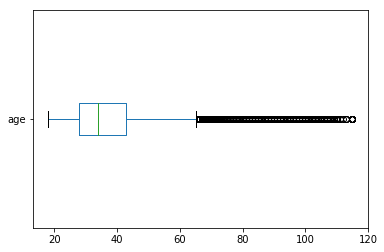

In [26]:
dfs['train_users_2'].age.plot.box(vert=False)

### Train_Users_2: Date Account Created

26 accounts have the date_first_booking before the date_account_created.  These should be excluded.

In [32]:
dfs['train_users_2'].date_first_booking = dfs_raw['train_users_2'].date_first_booking.astype('datetime64')
dfs['train_users_2'].date_account_created = dfs_raw['train_users_2'].date_account_created.astype('datetime64')

In [45]:
dfs_raw['train_users_2'].query('date_account_created > date_first_booking').id.count()

29

In [46]:
dfs['train_users_2'].describe(include='all')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,68108,68108,6.810800e+04,68108,68108,68108.000000,68108,68108.000000,68108,68108,68108,67754,68108,68108,68108,68108
unique,68108,1602,NaN,1945,4,NaN,3,NaN,23,8,16,7,4,9,36,11
top,ywotm39mpm,2014-05-20 00:00:00,NaN,2014-05-22 00:00:00,FEMALE,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
freq,1,200,NaN,193,29776,NaN,44794,NaN,66369,45709,45610,37280,61005,33734,24086,48312
first,NaN,2010-01-02 00:00:00,NaN,2010-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-06-30 00:00:00,NaN,2015-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.013026e+13,NaN,NaN,37.106023,NaN,2.436880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.512231e+09,NaN,NaN,13.746515,NaN,6.524797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.009103e+13,NaN,NaN,18.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.012111e+13,NaN,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
dfs['train_users_2'] = dfs['train_users_2'][dfs['train_users_2'].date_account_created <= dfs['train_users_2'].date_first_booking]

In [30]:
(dfs['train_users_2'].date_first_booking - dfs['train_users_2'].date_account_created).describe()

count                      68108
mean     50 days 17:23:08.876490
std      92 days 11:21:29.445969
min              0 days 00:00:00
25%              1 days 00:00:00
50%              4 days 00:00:00
75%             45 days 00:00:00
max            365 days 00:00:00
dtype: object

CM: We should clean this data
+ gender looks messy
+ some other columns (date_first_booking, age) have NaN's
+ I read a comment on kaggle saying there were bad age values >1000

### Train_Users_2: timestamp_first_active

In [31]:
dfs['train_users_2'][dfs['train_users_2']['date_account_created'] > pd.to_datetime(dfs['train_users_2'].timestamp_first_active)]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US
10,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US
15,v4d5rl22px,2010-01-07,20100107204555,2010-01-08,FEMALE,33.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,CA
17,frhre329au,2010-01-07,20100107224625,2010-01-09,-unknown-,31.0,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,US
19,gdka1q5ktd,2010-01-10,20100110010817,2010-01-10,FEMALE,29.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,FR
21,qsibmuz9sx,2010-01-10,20100110220941,2010-01-11,MALE,30.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,US


# Next Steps
+ Clean the data

+ Some research questions are represented by features in the data
  + Does demographic matter?
  + Does destination distance matter and is it related to other features?
  + Is there a relationship between user language and destination language?
    + Also see levenshtein_distance in countries df
  + Does it matter which sign-up method/flow is used?
+ Other research questions are operationalized via feature engineering
  + If the user is of a certain demographic, do they seek a corresponding demographic at their destination?
    + use age buckets df
  + Does the time between date_first_booking and date_account_created matter?
  + Is user "hesitation" a factor?
    + long or multiple sessions
    + lots of searches
  + Do specific actions matter?
  + Popularity of destination for user demographic versus 
  + Is time a factor?  The source training set is >2010 whereas the test set is >2014
    + EDA this?  Should explore time range of training set versus test set.  Maybe eliminate time as a feature if the test set is limited.  I'm curious if there would be "popularity booms" that would throw off conclusions - eg. ad campaign on facebook for a specific destination over a certain time period

+ For feature engineering we're basically appending columns to the train_users_2 and test_users data sets
  + Maybe also dropping some columns
  + Each row in train_users_2 is a unique user entry

+ Should EDA explore relationship between features?
  + If we identify covariance then it might be useful to identify deeper features

+ Scale features
  + OneHotEncoder for categorical features
  + StandardScaler for continuous

+ Try a few different classifiers
  + Did we want to attempt multi-layer architectures or ensemble methods (beyond random forest) ?
    + One layer might address user features -> destination
    + Next layer might address time series seasonality and trends
  + use GridSearchCV
  + don't bother splitting validation data (GridSearchCV and crossvalidate do that automatically)

+ Test results for classifiers
  + see again sklearn.scoring.crossvalidate

+ How to do ranking?
  + There are discussions and kernels regarding the ranking algorithm, need to explore that further